# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [5]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [6]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [8]:
print(app_train.shape)
print(app_train.columns)

(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [9]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(app_train['AMT_INCOME_TOTAL'].sum())
#print(app_train.iloc[0:5,0:10])
print(app_train['AMT_ANNUITY'].sum())
print(app_train['AMT_INCOME_TOTAL'].max())
print(app_train['AMT_ANNUITY'].cumsum())  # 累積總和
print(app_train['AMT_INCOME_TOTAL'].describe())

51907216960.935005
8335859368.5
117000000.0
0         2.470050e+04
1         6.039900e+04
2         6.714900e+04
3         9.683550e+04
4         1.187010e+05
5         1.462185e+05
6         1.875195e+05
7         2.295945e+05
8         2.634210e+05
9         2.836710e+05
10        3.048480e+05
11        3.155265e+05
12        3.214080e+05
13        3.503745e+05
14        3.831525e+05
15        4.033125e+05
16        4.294620e+05
17        4.429620e+05
18        4.508370e+05
19        4.684005e+05
20        4.897755e+05
21        5.273370e+05
22        5.598585e+05
23        5.837085e+05
24        5.964120e+05
25        6.074865e+05
26        6.345630e+05
27        6.583905e+05
28        7.160670e+05
29        7.250670e+05
              ...     
307481    8.335138e+09
307482    8.335173e+09
307483    8.335189e+09
307484    8.335225e+09
307485    8.335234e+09
307486    8.335252e+09
307487    8.335283e+09
307488    8.335297e+09
307489    8.335320e+09
307490    8.335329e+09
307491    8.3

In [11]:
#AMT_ANNUITY的最小值
print(app_train['AMT_ANNUITY'].min())
#AMT_ANNUITY的最大值
print(app_train['AMT_ANNUITY'].max())
#AMT_ANNUITY的中位數值
print(app_train['AMT_ANNUITY'].median())
#AMT_ANNUITY值的樣本方差
print(app_train['AMT_ANNUITY'].var())
#AMT_ANNUITY值的標準偏差
print(app_train['AMT_ANNUITY'].std())
#AMT_ANNUITY值的偏差
print(app_train['AMT_ANNUITY'].skew())
#AMT_ANNUITY值的峰值
print(app_train['AMT_ANNUITY'].kurt())
#相關的價值矩陣
print(app_train.corr())
#協方差矩陣的價值觀
print(app_train.cov())

1615.5
258025.5
24903.0
210068421.35962632
14493.737315117392
1.5797773638612507
7.707319914804311
                             SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                   

                               SK_ID_CURR        TARGET  CNT_CHILDREN  \
SK_ID_CURR                   1.056582e+10 -5.904127e+01 -8.381982e+01   
TARGET                      -5.904127e+01  7.421192e-02  3.774480e-03   
CNT_CHILDREN                -8.381982e+01  3.774480e-03  5.214593e-01   
AMT_INCOME_TOTAL            -4.436777e+07 -2.572156e+02  2.205820e+03   
AMT_CREDIT                  -1.419730e+07 -3.329871e+03  6.235671e+02   
AMT_ANNUITY                 -6.449708e+05 -5.060535e+01  2.237060e+02   
AMT_GOODS_PRICE             -8.802091e+06 -3.990170e+03 -4.874046e+02   
REGION_POPULATION_RELATIVE   1.207224e+00 -1.402681e-04 -2.554179e-04   
DAYS_BIRTH                  -6.727735e+05  9.301338e+01  1.042894e+03   
DAYS_EMPLOYED                1.984012e+07 -1.729247e+03 -2.446582e+04   
DAYS_REGISTRATION           -3.524820e+05  4.028327e+01  4.665487e+02   
DAYS_ID_PUBLISH             -5.963704e+04  2.115931e+01 -3.054135e+01   
OWN_CAR_AGE                  2.234461e+03  1.164569

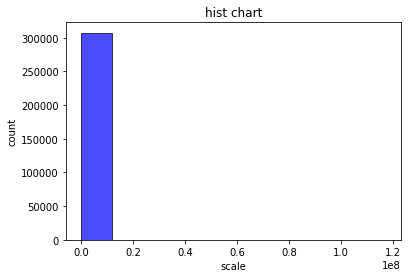

In [12]:
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
#plt.hist(app_train['AMT_INCOME_TOTAL'], bins=10, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(app_train['AMT_INCOME_TOTAL'], facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("scale")
# 显示纵轴标签
plt.ylabel("count")
# 显示图标题
plt.title("hist chart")
plt.show()

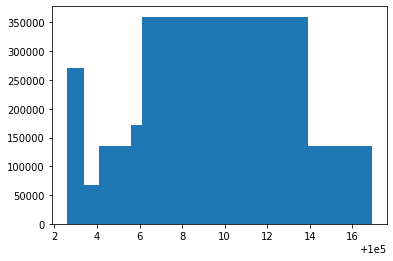

In [15]:
#app_train['SK_ID_CURR'][1:10]
plt.bar(app_train['SK_ID_CURR'][1:10],app_train['AMT_INCOME_TOTAL'][1:10])
plt.show()